In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('misc/results_evaluation.csv')

In [4]:
free_df = pd.read_csv('misc/free_transfers.csv')
free_df.NNstack = free_df.NNstack.round(2)

In [5]:
df.LR = df.LR.round(2)
df.BWKNN = df.BWKNN.round(2)
df.RF = df.RF.round(2)
df.GB = df.GB.round(2)
df.NN = df.NN.round(2)
df.LRstack = df.LRstack.round(2)
df.NNstack = df.NNstack.round(2)

In [6]:
df.NNstack.loc[df.NNstack <= 0] = 0.001
df['NNstackDelta'] = df.fee_cleaned - df.NNstack
df['NNstackDeltaPercentage'] =  df.NNstackDelta/df.fee_cleaned

In [7]:
print(df[['player_name','club_involved_name','season','fee_cleaned', 'NNstack', 'NNstackDelta']].sort_values('fee_cleaned', ascending = False).head(100).to_latex(index = False))

\begin{tabular}{lllrrr}
\toprule
           player\_name &       club\_involved\_name &     season &  fee\_cleaned &  NNstack &  NNstackDelta \\
\midrule
                Neymar &      Paris Saint-Germain &  2017/2018 &       199.80 &   160.60 &         39.20 \\
         Kylian Mbappé &      Paris Saint-Germain &  2018/2019 &       130.50 &    72.23 &         58.27 \\
       Ousmane Dembélé &             FC Barcelona &  2017/2018 &       124.20 &    50.48 &         73.72 \\
            João Félix &          Atlético Madrid &  2019/2020 &       113.40 &    72.05 &         41.35 \\
     Antoine Griezmann &             FC Barcelona &  2019/2020 &       108.00 &   112.90 &         -4.90 \\
     Cristiano Ronaldo &              Juventus FC &  2018/2019 &       105.30 &   117.79 &        -12.49 \\
           Eden Hazard &              Real Madrid &  2019/2020 &       103.50 &    64.13 &         39.37 \\
            Paul Pogba &        Manchester United &  2016/2017 &        94.50 &    82.62 &

In [8]:
print(df[((df.club_involved_name == 'SL Benfica') | (df.club_involved_name == 'FC Porto') | (df.club_involved_name == 'Sporting CP'))][['player_name','club_involved_name', 'season','fee_cleaned', 'NNstack', 'NNstackDelta']].sort_values('fee_cleaned', ascending = False).head(12).to_latex(index = False))

\begin{tabular}{lllrrr}
\toprule
       player\_name & club\_involved\_name &     season &  fee\_cleaned &  NNstack &  NNstackDelta \\
\midrule
      Raúl Jiménez &         SL Benfica &  2015/2016 &        19.80 &    11.19 &          8.61 \\
  Giannelli Imbula &           FC Porto &  2015/2016 &        18.00 &    26.85 &         -8.85 \\
 Vincent Aboubakar &           FC Porto &  2014/2015 &        11.07 &     8.48 &          2.59 \\
          Bas Dost &        Sporting CP &  2016/2017 &        10.67 &     5.90 &          4.77 \\
           Zé Luís &           FC Porto &  2019/2020 &         9.68 &    13.15 &         -3.47 \\
      Mamadou Loum &           FC Porto &  2019/2020 &         6.75 &     5.10 &          1.65 \\
    Yacine Brahimi &           FC Porto &  2014/2015 &         5.85 &    18.41 &        -12.56 \\
   Valentin Rosier &        Sporting CP &  2019/2020 &         4.50 &     9.21 &         -4.71 \\
    Chancel Mbemba &           FC Porto &  2018/2019 &         4.19 &   

In [9]:
free_df[free_df.player_name == 'Yacine Brahimi']

,Unnamed: 0,Unnamed: 0.1,player_name,club_involved_name,season,age,wage,value,cost,ratingFM,...,fee_cleaned,fee_log,LR,BWKNN,RF,GB,NN,LRstack,NNstack,SimpleAvg
677,2222,2267,Yacine Brahimi,RC Strasbourg Alsace,2019/2020,0.391356,0.440217,1.670047,0.164535,2.032909,...,0.0,0.0,17.890282,16.611429,23.1917,17.238727,11.326335,16.321231,17.12,17.251695


In [22]:
print(df[df.fee_cleaned>10][['player_name','club_involved_name', 'season','fee_cleaned', 'NNstack', 'NNstackDelta', 'NNstackDeltaPercentage']].sort_values('NNstackDelta', ascending = False).tail(20).to_latex(index = False))

\begin{tabular}{lllrrrr}
\toprule
       player\_name &       club\_involved\_name &     season &  fee\_cleaned &  NNstack &  NNstackDelta &  NNstackDeltaPercentage \\
\midrule
        Diogo Jota &  Wolverhampton Wanderers &  2018/2019 &        12.60 &    28.29 &        -15.69 &               -1.245238 \\
          Angeliño &             Cardiff City &  2019/2020 &        10.80 &    27.82 &        -17.02 &               -1.575926 \\
       Niklas Süle &            Bayern Munich &  2017/2018 &        18.00 &    35.04 &        -17.04 &               -0.946667 \\
   Patrick Cutrone &  Wolverhampton Wanderers &  2019/2020 &        19.80 &    36.89 &        -17.09 &               -0.863131 \\
      Luuk de Jong &               Sevilla FC &  2019/2020 &        11.25 &    28.57 &        -17.32 &               -1.539556 \\
        Yerry Mina &               Everton FC &  2018/2019 &        27.23 &    46.31 &        -19.08 &               -0.700698 \\
       Mario Götze &        Borussia Dortmu

In [11]:
print(free_df[['player_name','club_involved_name', 'season','fee_cleaned', 'NNstack']].sort_values('NNstack', ascending = True).tail(50).to_latex(index = False))

\begin{tabular}{lllrr}
\toprule
          player\_name &     club\_involved\_name &     season &  fee\_cleaned &  NNstack \\
\midrule
      Oussama Tannane &              VVV-Venlo &  2020/2021 &          0.0 &     9.34 \\
        Ander Herrera &    Paris Saint-Germain &  2019/2020 &          0.0 &     9.61 \\
       Hatem Ben Arfa &  SC Cambuur-Leeuwarden &  2019/2020 &          0.0 &     9.83 \\
        José Callejón &  SC Cambuur-Leeuwarden &  2020/2021 &          0.0 &     9.91 \\
          Filipe Luís &              Fulham FC &  2019/2020 &          0.0 &    10.04 \\
           Yaya Touré &  SC Cambuur-Leeuwarden &  2018/2019 &          0.0 &    10.06 \\
             Mark Uth &          FC Schalke 04 &  2018/2019 &          0.0 &    10.52 \\
            Max Kruse &              Fulham FC &  2019/2020 &          0.0 &    10.72 \\
         Arjen Robben &  SC Cambuur-Leeuwarden &  2019/2020 &          0.0 &    10.90 \\
       Blaise Matuidi &            Inter Milan &  2020/2021 &    

In [12]:
print(df[['player_name','club_involved_name','fee_cleaned','LR', 'BWKNN', 'RF', 'GB', 'NN', 'LRstack', 'NNstack']].sort_values('fee_cleaned', ascending = False).head(20).to_latex(index = False))

\begin{tabular}{llrrrrrrrr}
\toprule
       player\_name &   club\_involved\_name &  fee\_cleaned &      LR &  BWKNN &     RF &      GB &      NN &  LRstack &  NNstack \\
\midrule
            Neymar &  Paris Saint-Germain &       199.80 &  115.02 &  61.99 &  88.72 &  100.50 &  177.76 &   144.68 &   160.60 \\
     Kylian Mbappé &  Paris Saint-Germain &       130.50 &   75.50 &  28.84 &  31.37 &   66.34 &   81.81 &    68.98 &    72.23 \\
   Ousmane Dembélé &         FC Barcelona &       124.20 &   37.93 &  39.80 &  32.35 &   45.35 &   60.37 &    55.55 &    50.48 \\
        João Félix &      Atlético Madrid &       113.40 &   30.95 &  23.08 &  43.97 &   59.97 &   85.95 &    63.19 &    72.05 \\
 Antoine Griezmann &         FC Barcelona &       108.00 &  157.77 &  41.51 &  98.28 &   87.46 &  149.65 &   129.39 &   112.90 \\
 Cristiano Ronaldo &          Juventus FC &       105.30 &  119.31 &  62.76 &  95.77 &  103.00 &  133.86 &   122.77 &   117.79 \\
       Eden Hazard &          Real Madri

In [13]:
features_impacts = pd.read_csv('misc/feature_impacts.csv').drop('Unnamed: 0', axis = 1)

In [14]:
features_impacts

,feature,LR,BWKNN,RF,GB,NN
0,age,-5.252281,0.998725,0.020144,0.047291,1
1,wage,5.513349,0.872637,0.144428,0.132652,1
2,ratingFM,2.882290,0.854993,0.032010,0.016201,1
3,potential,0.000000,0.000000,0.327152,0.322859,0
4,injprone,0.000000,0.000000,0.003201,0.001295,1
...,...,...,...,...,...,...
68,year,1.518230,0.418116,0.001982,0.000186,0
69,GDP,0.006010,0.000000,0.004010,0.001128,0
70,CountryPopulation,0.347647,0.000000,0.004572,0.004685,1
71,UEFAranking,-2.020774,0.933996,0.005542,0.009505,1


In [15]:
og_rf_fi = {'age':0.061069301392212345,'wage':0.0069335238601626464,'value':0.02411048689035172,'cost':0.4464219311075624,'ratingFM':0.009152573712969238,'potential':0.011458417242471802,'injprone':0.004125602647892264,'afterloan':0.04784417982135045,'contract':0.1569900500857435,'reputation':0.008062502521839961,'balance':0.0037590210026702967,'wagebudget':0.003662516700183858,'trainingfacilities':0.001821702174011351,'youthfacilities':0.0028822695351152466,'youthacademy':0.0032492814509534553,'stadiumcap':0.005734793052134372,'avgattendance':0.006759940593639612,'gamesPlayed':0.031129179718078655,'subedOn':0.0037839090128156633,'MotM':0.0034894881770803246,'ratingWS':0.020426893617205937,'goalsScored':0.007752412635846105,'assists':0.003622344828647144,'shots':0.003943605894202124,'passes':0.0026065581350573253,'passesSuccess':0.002741677669994274,'aerialsWon':0.004259949956090796,'keyPasses':0.0030377660762606696,'dribbles':0.005802653484770202,'offsides':0.0028962106545516388,'dispossessed':0.0029178017042614628,'badTouch':0.005297984435566637,'crosses':0.0032075120029665346,'longBalls':0.0035013591016086025,'throughBalls':0.004438570195880969,'yellow':0.004224684210767917,'red':0.0005262735326830268,'tackles':0.004360892942967089,'interceptions':0.003149654169797034,'fouls':0.003442795694537824,'offsidesProvoked':0.0032835583616160104,'clearances':0.003211071663694731,'blockedPass':0.003699184746766483,'ownGoal':0.00048789173603528557,'ATaction':0.0048281252773653355,'ATgoals':0.0028939315120942756,'ATassists':0.0024713685487964833,'ATshots':0.0025978184922432496,'ATpasses':0.0017666066304909943,'ATpassesSuccess':0.0017166834251692708,'ATtackles':0.0036716488552900103,'ATinterceptions':0.002442424981094889,'ATMotM':0.002445398116152529,'ATrating':0.0032190027038996416,'CLaction':0.002055747392397641,'CLgoals':0.001143468224457444,'CLassists':0.0009268484548148983,'CLMotM':0.000692076811744193,'CLrating':0.0021768375337403527,'ELaction':0.0012493761182740893,'ELgoals':0.0005809337475875765,'ELassists':0.00033782102356721245,'ELMotM':0.0002632436251512864,'ELrating':0.0013091141988220269,'GK':2.4230617379836748e-05,'DEF':0.00014019014855778516,'MID':0.000672801355207542,'STR':0.00021974654810116867,'Wing':0.0002997383540237273,'Central':0.0003822893175689868,'year':0.0013498480510166727,'GDP':0.003370711739416387,'CountryPopulation':0.0034227548699886784,'UEFAranking':0.004761337146156265,'eurgbp':0.0012878980284146896}

In [16]:
temp_data = []
for i in features_impacts.feature:
    temp_data.append(og_rf_fi[i])
features_impacts['OGRF'] = temp_data
for key in og_rf_fi.keys():
    if key not in list(features_impacts.feature):
        features_impacts.loc[len(features_impacts)] = [key, 0, 0, 0, 0, 0, og_rf_fi[key]]

In [17]:
features_impacts

,feature,LR,BWKNN,RF,GB,NN,OGRF
0,age,-5.252281,0.998725,0.020144,0.047291,1,0.061069
1,wage,5.513349,0.872637,0.144428,0.132652,1,0.006934
2,ratingFM,2.882290,0.854993,0.032010,0.016201,1,0.009153
3,potential,0.000000,0.000000,0.327152,0.322859,0,0.011458
4,injprone,0.000000,0.000000,0.003201,0.001295,1,0.004126
...,...,...,...,...,...,...,...
70,CountryPopulation,0.347647,0.000000,0.004572,0.004685,1,0.003423
71,UEFAranking,-2.020774,0.933996,0.005542,0.009505,1,0.004761
72,eurgbp,0.000000,0.140457,0.002050,0.000107,1,0.001288
73,value,0.000000,0.000000,0.000000,0.000000,0,0.024110


In [18]:
features_impacts = features_impacts.set_index('feature')
features_impacts

,LR,BWKNN,RF,GB,NN,OGRF
feature,,,,,,
age,-5.252281,0.998725,0.020144,0.047291,1,0.061069
wage,5.513349,0.872637,0.144428,0.132652,1,0.006934
ratingFM,2.882290,0.854993,0.032010,0.016201,1,0.009153
potential,0.000000,0.000000,0.327152,0.322859,0,0.011458
injprone,0.000000,0.000000,0.003201,0.001295,1,0.004126
...,...,...,...,...,...,...
CountryPopulation,0.347647,0.000000,0.004572,0.004685,1,0.003423
UEFAranking,-2.020774,0.933996,0.005542,0.009505,1,0.004761
eurgbp,0.000000,0.140457,0.002050,0.000107,1,0.001288


In [19]:
features_impacts.OGRF = (features_impacts.OGRF) / max(abs(features_impacts.OGRF.min()), features_impacts.OGRF.max())
features_impacts.LR = (features_impacts.LR) / max(abs(features_impacts.LR.min()), features_impacts.LR.max())
features_impacts.BWKNN = (features_impacts.BWKNN) / max(abs(features_impacts.BWKNN.min()), features_impacts.BWKNN.max())
features_impacts.RF = (features_impacts.RF) / max(abs(features_impacts.RF.min()), features_impacts.RF.max())
features_impacts.GB = (features_impacts.GB) / max(abs(features_impacts.GB.min()), features_impacts.GB.max())
features_impacts.NN = (features_impacts.NN) / max(abs(features_impacts.NN.min()), features_impacts.NN.max())

In [20]:
features_impacts['total'] = abs(features_impacts).sum(axis=1)
features_impacts = features_impacts.sort_values('total', ascending = False).drop('total', axis = 1)

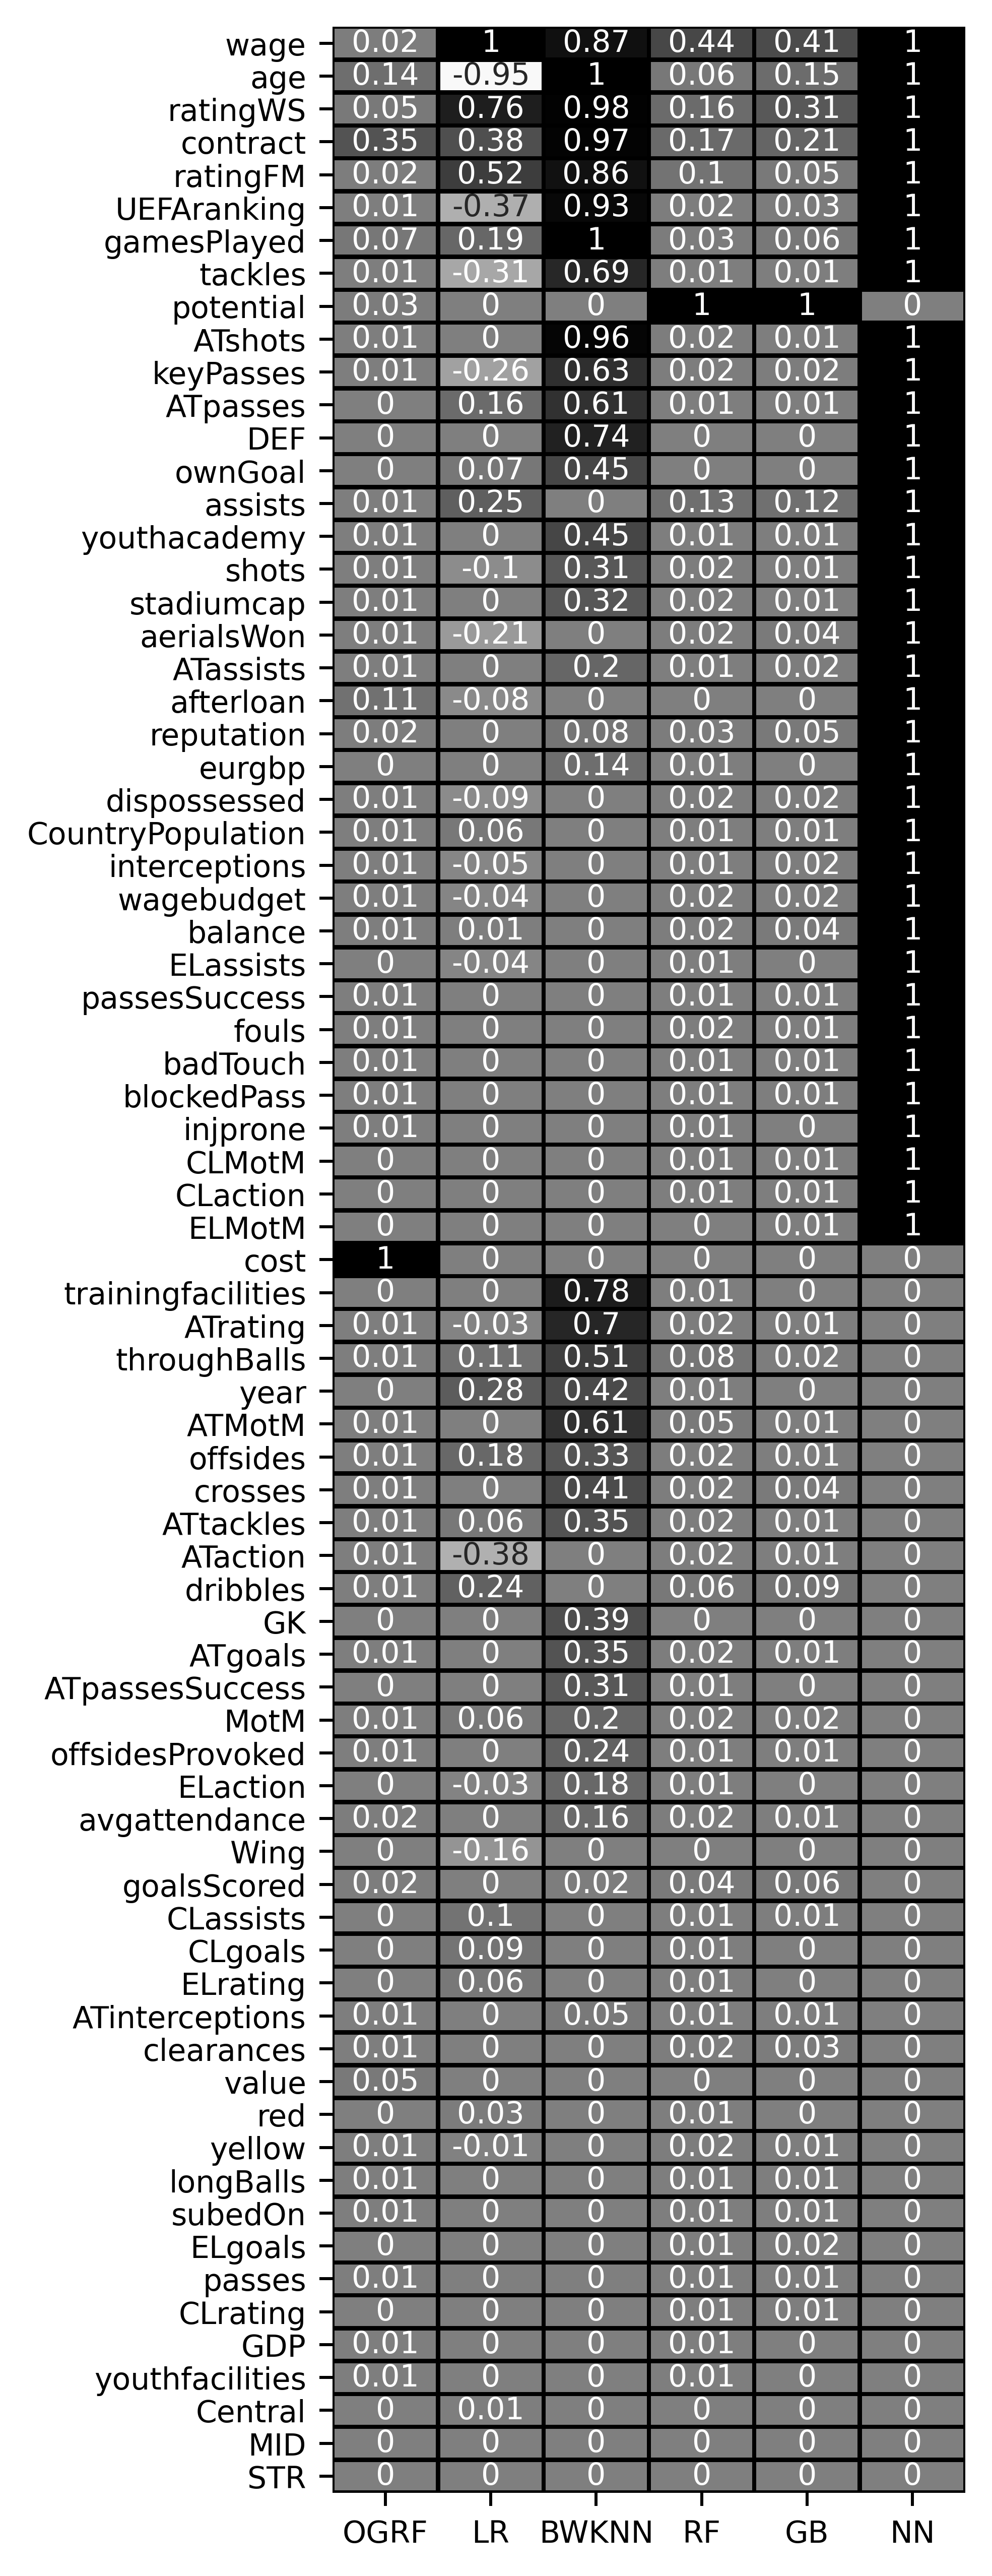

In [21]:
plt.style.use('grayscale')
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['figure.dpi'] = 540
plt.rcParams['figure.figsize'] = (3,12)
plt.rcParams['font.size'] = 8

sns.heatmap(features_impacts[['OGRF', 'LR', 'BWKNN', 'RF', 'GB', 'NN']].round(2), cmap='binary', vmin=-1, vmax=1, linewidths=1, linecolor='black', annot = True, cbar = False);
plt.ylabel('')

plt.savefig('img/010-1CorrMatrix.eps', format='eps', bbox_inches='tight')